In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/superstore-sales/Superstore.csv
/kaggle/input/superstore-sales/Superstore.xlsx


In [14]:
import pandas as pd
import seaborn as sns 
import numpy as np

In [4]:
df = pd.read_csv('/kaggle/input/superstore-sales/Superstore.csv', encoding='ISO-8859-1')
df.head(2)


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2013-152156,09-11-2013,12-11-2013,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96,2,0.0,41.9136
1,2,CA-2013-152156,09-11-2013,12-11-2013,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94,3,0.0,219.5820


In [4]:
df[df.duplicated()].shape[0]

0

In [5]:
df.isnull().sum()

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

In [9]:
df.shape[0]

9994

In [3]:
total_customer=df["Customer ID"].unique().shape
total_product=df["Customer ID"].unique().shape

In [11]:
df['Category'].value_counts()


Category
Office Supplies    6026
Furniture          2121
Technology         1847
Name: count, dtype: int64

In [11]:
import matplotlib.pyplot as plt

<Axes: title={'center': 'category wise sell'}, xlabel='Category', ylabel='count'>

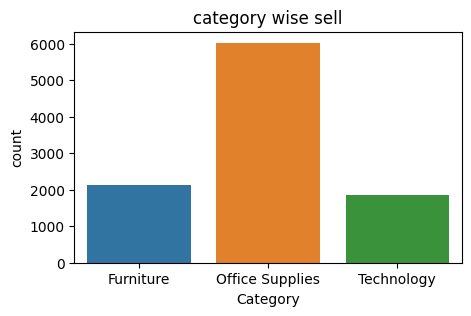

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(5,3))
plt.title("category wise sell")
plt.savefig("category wise sell.jpg")
sns.countplot(x='Category',data=df)

Text(0.5, 1.0, 'Distribution of Subcategory for Furniture ')

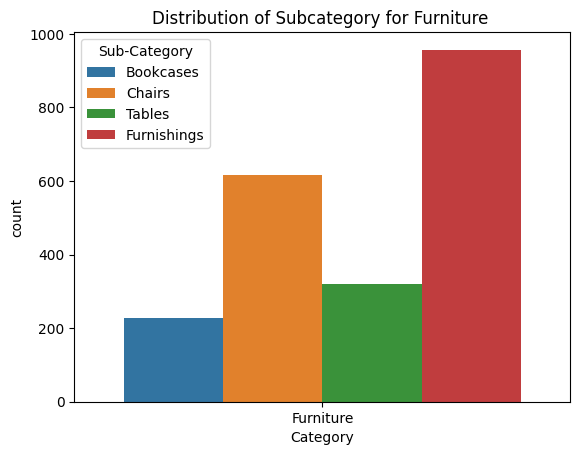

In [10]:
sns.countplot(x="Category",data=df[df["Category"]=="Furniture"],hue="Sub-Category")
plt.title("Distribution of Subcategory for Furniture ")

Text(0.5, 1.0, 'Distribution of Subcategory for office supplies ')

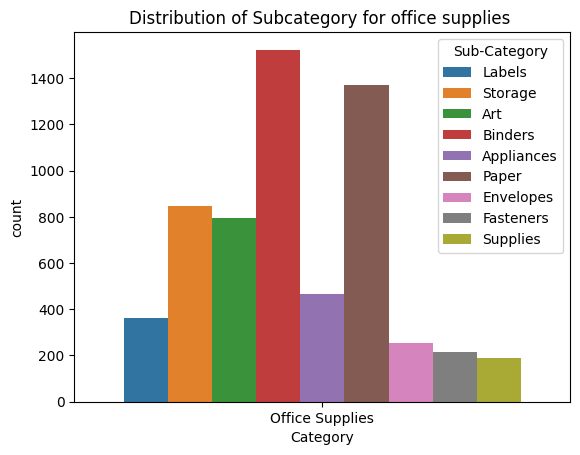

In [13]:
sns.countplot(x="Category",data=df[df["Category"]=="Office Supplies"],hue="Sub-Category")
plt.title("Distribution of Subcategory for office supplies ")

Text(0.5, 1.0, 'Distribution of Subcategory for Technology')

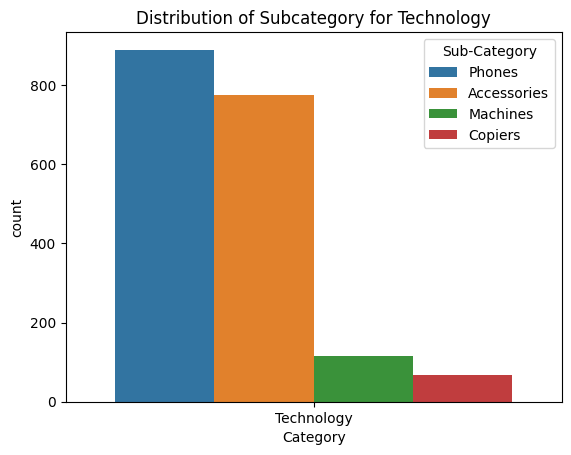

In [14]:
sns.countplot(x="Category",data=df[df["Category"]=="Technology"],hue="Sub-Category")
plt.title("Distribution of Subcategory for Technology")

In [19]:
df["Ship Mode"].value_counts()

Ship Mode
Standard Class    5968
Second Class      1945
First Class       1538
Same Day           543
Name: count, dtype: int64

In [18]:
x=df["Ship Mode"].value_counts().index
y=df["Ship Mode"].value_counts().values


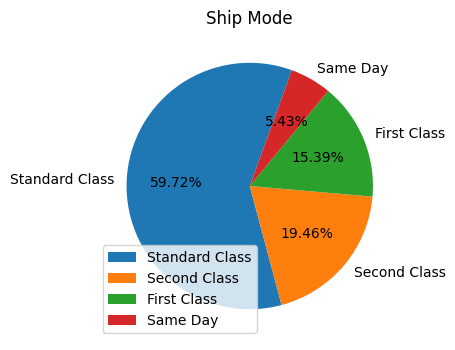

In [21]:
plt.figure(figsize=(5,4))
plt.pie(y,labels=x,startangle=70,autopct="%0.2f%%")
plt.legend(loc=3)

plt.title("Ship Mode")

plt.show()

<Axes: xlabel='Category', ylabel='count'>

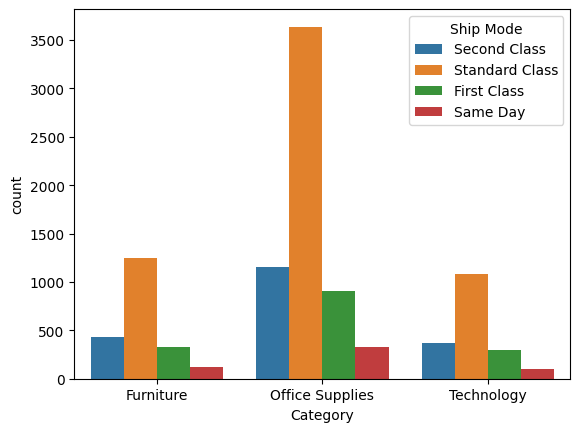

In [22]:
sns.countplot(x="Category",data=df,hue="Ship Mode")

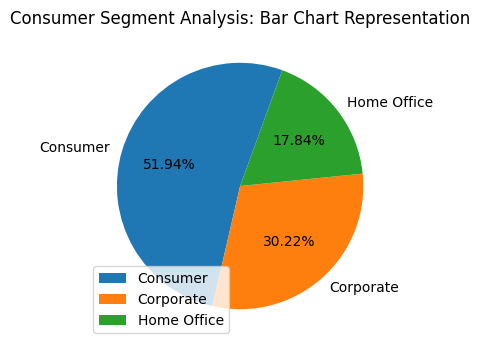

In [25]:
x=df["Segment"].value_counts().index
y=df["Segment"].value_counts().values
plt.figure(figsize=(5,4))
plt.pie(y,labels=x,startangle=70,autopct="%0.2f%%")
plt.legend(loc=3)

plt.title("Consumer Segment Analysis: Bar Chart Representation")
plt.show()

<Axes: xlabel='Segment', ylabel='count'>

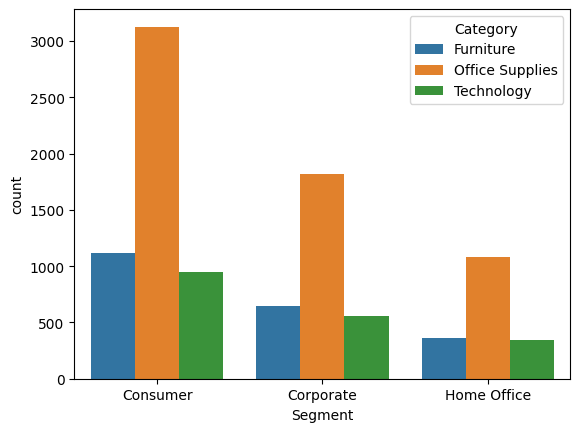

In [24]:
sns.countplot(x="Segment",data=df,hue="Category")

In [5]:
df["sdate"]=pd.to_datetime(df["Ship Date"],errors='coerce')

df["odate"]=pd.to_datetime(df["Order Date"],errors='coerce')




In [6]:
df["time"]=df["sdate"]-df["odate"]
df["time"]

0       91 days
1       91 days
2           NaT
3           NaT
4           NaT
         ...   
9989        NaT
9990        NaT
9991        NaT
9992        NaT
9993   153 days
Name: time, Length: 9994, dtype: timedelta64[ns]

<Axes: xlabel='Category', ylabel='Profit'>

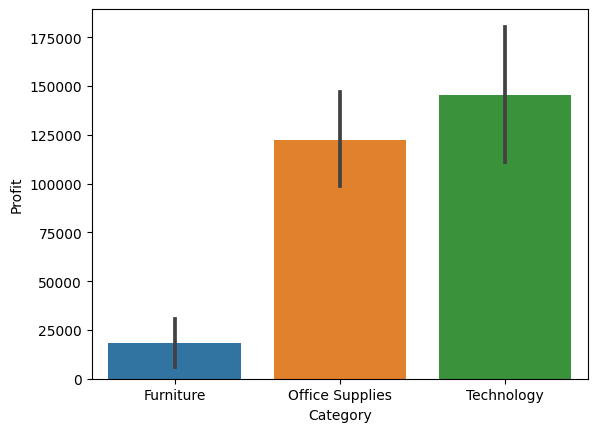

In [7]:
sns.barplot(x="Category",y="Profit",data=df,estimator='sum')

In [ ]:
df.head(1)

In [11]:
df["City"].value_counts().head(5)

City
New York City    915
Los Angeles      747
Philadelphia     537
San Francisco    510
Seattle          428
Name: count, dtype: int64

In [ ]:
#sns.countplot(x="Category",data=df[df["Category"]=="Office Supplies"],hue="City")

In [25]:
#sns.countplot(x="Sub-Category",data=df[df["Sub-Category"]=="Copiers"],hue="Profit")

In [23]:
df["Sub-Category"].value_counts()

Sub-Category
Binders        1523
Paper          1370
Furnishings     957
Phones          889
Storage         846
Art             796
Accessories     775
Chairs          617
Appliances      466
Labels          364
Tables          319
Envelopes       254
Bookcases       228
Fasteners       217
Supplies        190
Machines        115
Copiers          68
Name: count, dtype: int64

<Axes: xlabel='Sub-Category', ylabel='Profit'>

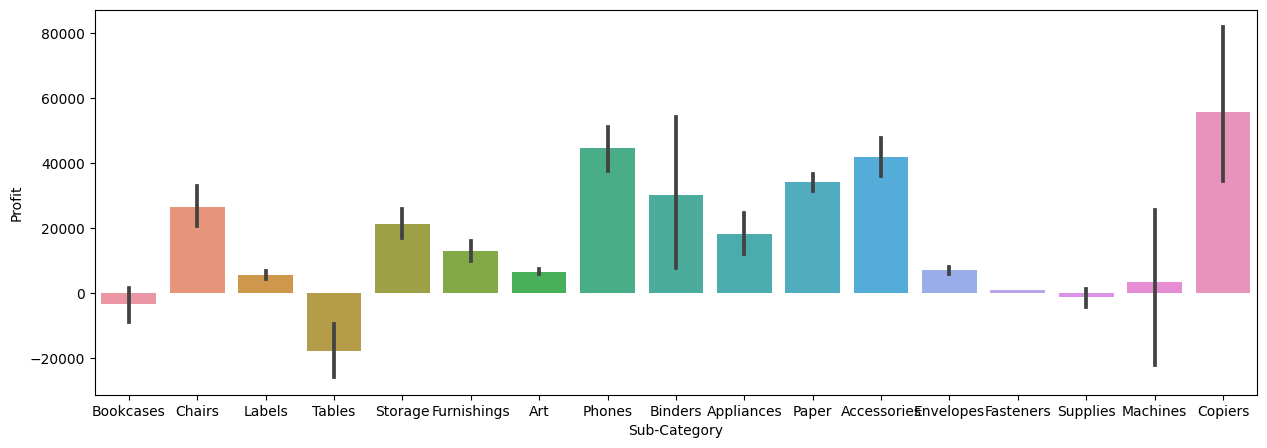

In [21]:
plt.figure(figsize=(15,5))
sns.barplot(x="Sub-Category",y="Profit",data=df,estimator=np.sum)


In [9]:
df[df["Sub-Category"]== "Fasteners"].shape
df[df["Sub-Category"]== "Phones"].shape

(889, 21)

<Axes: xlabel='Sub-Category', ylabel='Discount'>

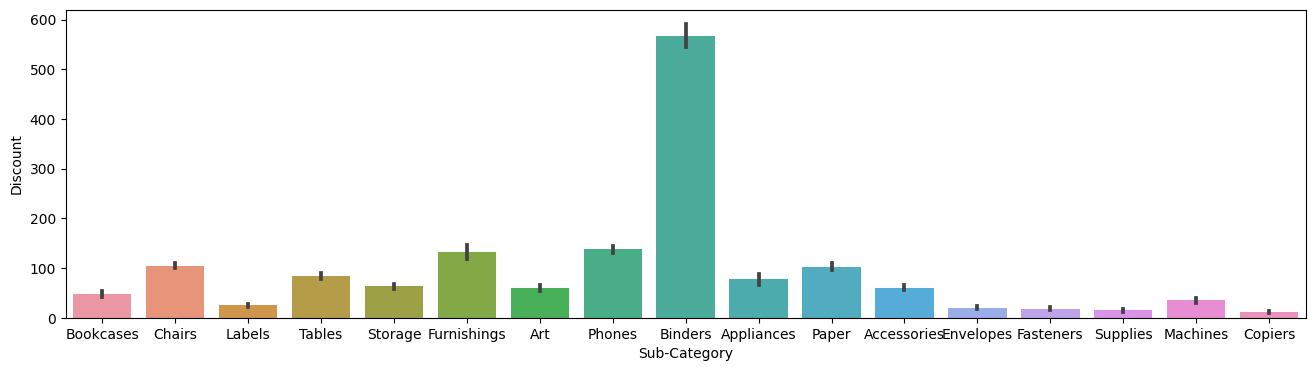

In [22]:
plt.figure(figsize=(16,4))
sns.barplot(x="Sub-Category",y="Discount",data=df,estimator=np.sum)

In [35]:
df["City"].value_counts()

City
New York City      915
Los Angeles        747
Philadelphia       537
San Francisco      510
Seattle            428
                  ... 
Glenview             1
Missouri City        1
Rochester Hills      1
Palatine             1
Manhattan            1
Name: count, Length: 531, dtype: int64

In [39]:
df.Region.value_counts()

Region
West       3203
East       2848
Central    2323
South      1620
Name: count, dtype: int64

<Axes: xlabel='Region', ylabel='count'>

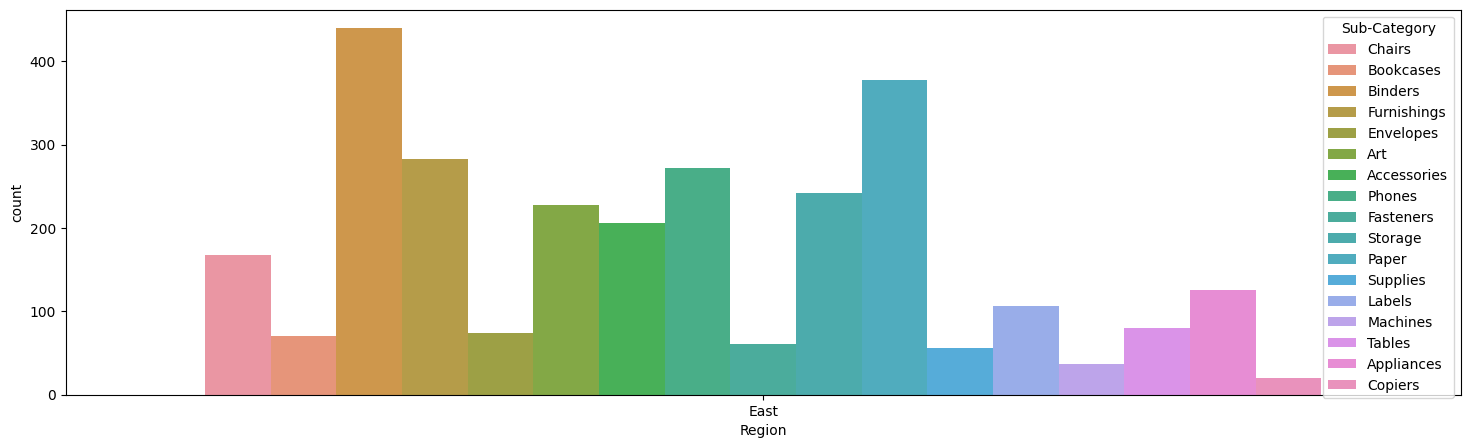

In [24]:
plt.figure(figsize=(18,5))
sns.countplot(x="Region",data=df[df["Region"]=="East"],hue="Sub-Category")


<Axes: xlabel='Region', ylabel='count'>

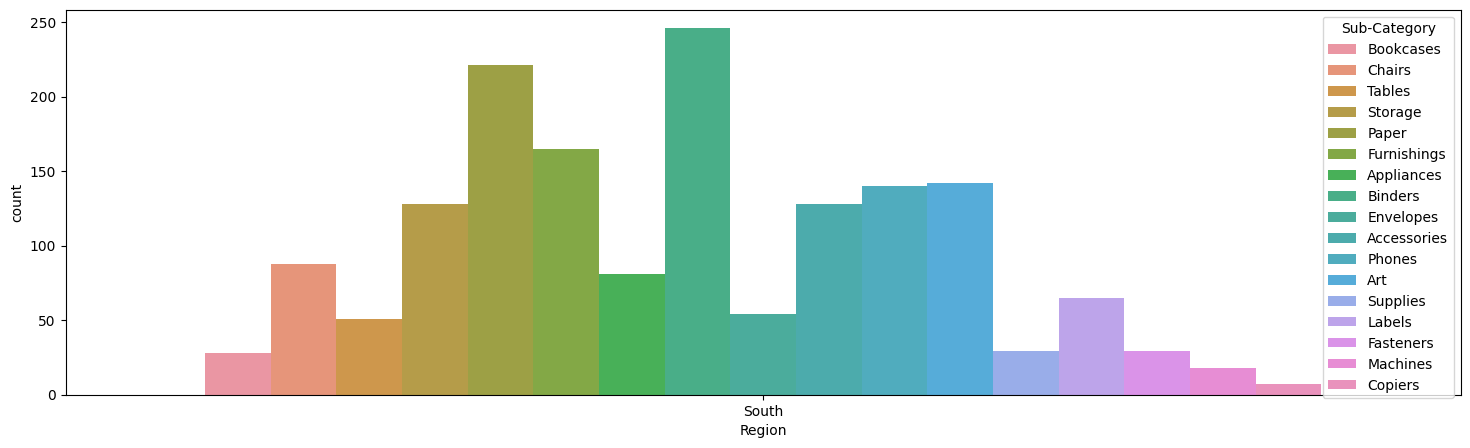

In [26]:
plt.figure(figsize=(18,5))
sns.countplot(x="Region",data=df[df["Region"]=="South"],hue="Sub-Category")


<Axes: xlabel='Region', ylabel='count'>

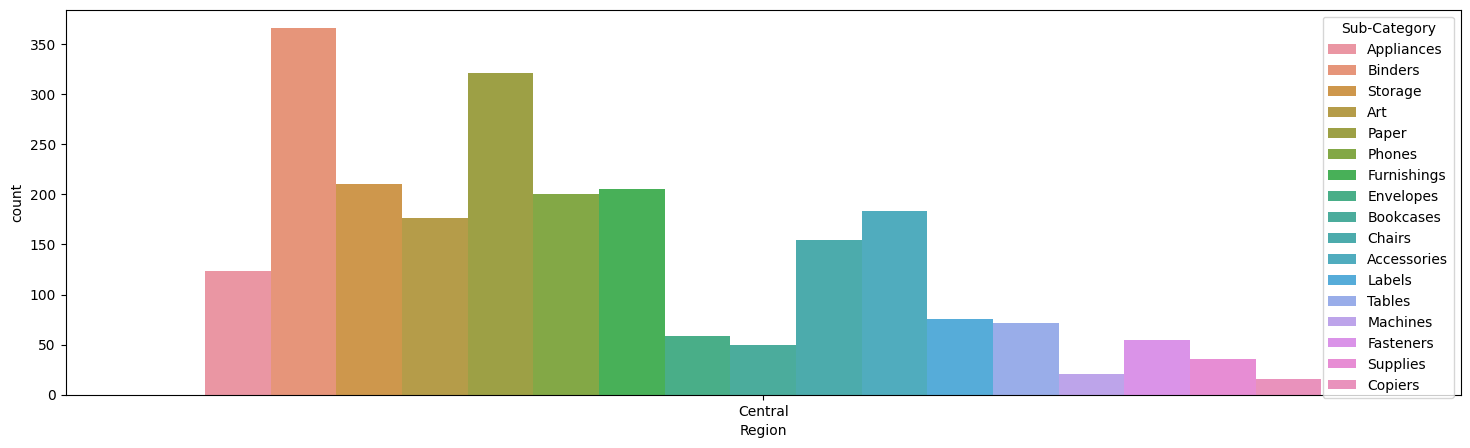

In [27]:
plt.figure(figsize=(18,5))
sns.countplot(x="Region",data=df[df["Region"]=="Central"],hue="Sub-Category")


<Axes: xlabel='Region', ylabel='count'>

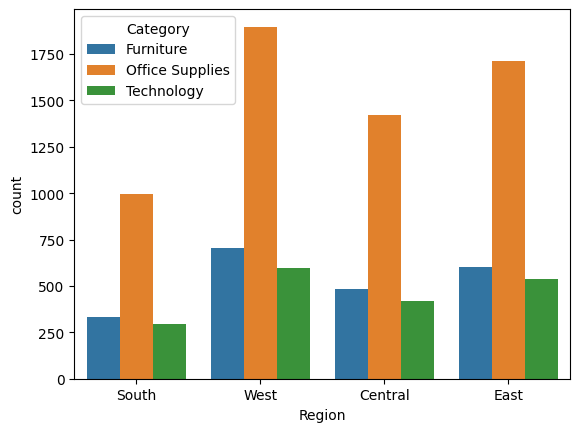

In [49]:
sns.countplot(x="Region",data=df,hue="Category")


<Axes: xlabel='Region', ylabel='count'>

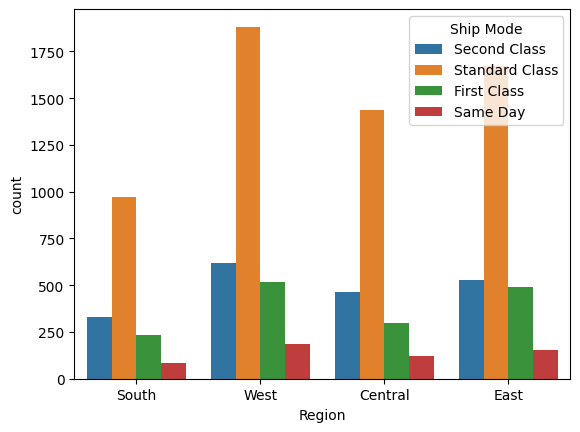

In [51]:
sns.countplot(x="Region",data=df,hue="Ship Mode")


<Axes: ylabel='count'>

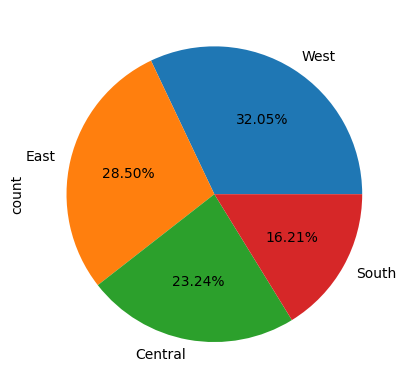

In [54]:
df["Region"].value_counts().plot(kind="pie",autopct="%0.2f%%")

In [70]:
df.head(2)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,sdate,odate
0,1,CA-2013-152156,09-11-2013,12-11-2013,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96,2,0.0,41.9136,2013-12-11,2013-09-11
1,2,CA-2013-152156,09-11-2013,12-11-2013,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94,3,0.0,219.5820,2013-12-11,2013-09-11


In [76]:
df["dele"]=df["sdate"]-df["odate"]
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 25 columns):
 #   Column         Non-Null Count  Dtype          
---  ------         --------------  -----          
 0   Row ID         9994 non-null   int64          
 1   Order ID       9994 non-null   object         
 2   Order Date     9994 non-null   object         
 3   Ship Date      9994 non-null   object         
 4   Ship Mode      9994 non-null   object         
 5   Customer ID    9994 non-null   object         
 6   Customer Name  9994 non-null   object         
 7   Segment        9994 non-null   object         
 8   Country        9994 non-null   object         
 9   City           9994 non-null   object         
 10  State          9994 non-null   object         
 11  Postal Code    9994 non-null   int64          
 12  Region         9994 non-null   object         
 13  Product ID     9994 non-null   object         
 14  Category       9994 non-null   object         
 15  Sub-

In [83]:
df.drop(axis=0,columns="dele",inplace=True)
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         9994 non-null   int64         
 1   Order ID       9994 non-null   object        
 2   Order Date     9994 non-null   object        
 3   Ship Date      9994 non-null   object        
 4   Ship Mode      9994 non-null   object        
 5   Customer ID    9994 non-null   object        
 6   Customer Name  9994 non-null   object        
 7   Segment        9994 non-null   object        
 8   Country        9994 non-null   object        
 9   City           9994 non-null   object        
 10  State          9994 non-null   object        
 11  Postal Code    9994 non-null   int64         
 12  Region         9994 non-null   object        
 13  Product ID     9994 non-null   object        
 14  Category       9994 non-null   object        
 15  Sub-Category   9994 n

In [86]:
df['delivery_time'] = (df['sdate'] - df['odate']).dt.days
mean_delivery_time = df.groupby('Ship Mode')['delivery_time'].mean()
mean_delivery_time

Ship Mode
First Class        63.410959
Same Day            1.355263
Second Class       96.655493
Standard Class    145.841339
Name: delivery_time, dtype: float64

<Axes: xlabel='Ship Mode', ylabel='Profit'>

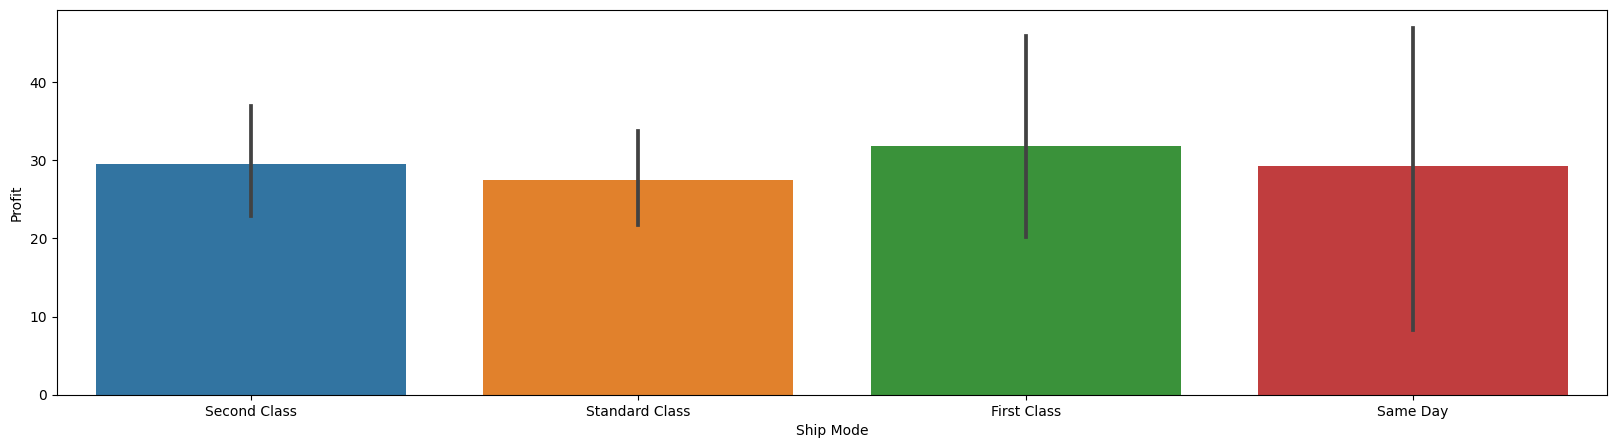

In [31]:
plt.figure(figsize=(20,5))
sns.barplot(x="Ship Mode",y="Profit",data=df,estimator=np.mean)

<Axes: ylabel='count'>

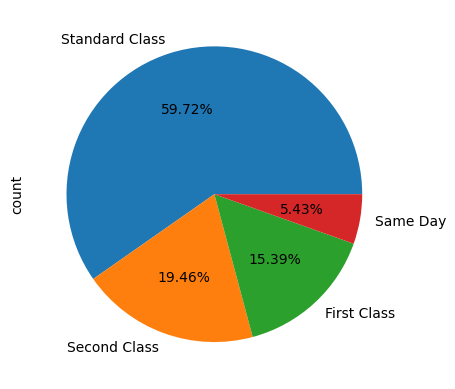

In [29]:
df["Ship Mode"].value_counts().plot(kind="pie",autopct="%0.2f%%")